<a href="https://colab.research.google.com/github/Shalini-13/733-assignment/blob/main/hm3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/faithful.csv')

# View the first few rows
data.head()

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


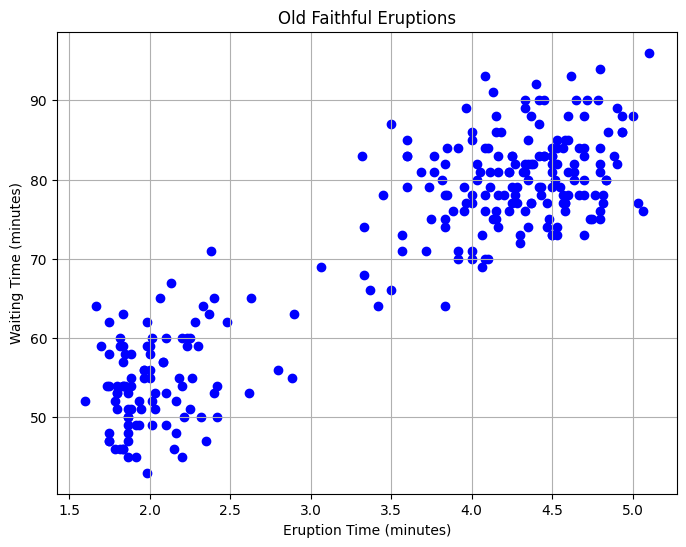

In [3]:
# 1. Scatter plot of eruption time vs waiting time
plt.figure(figsize=(8,6))
plt.scatter(data.iloc[:,0], data.iloc[:,1], color='blue')
plt.title('Old Faithful Eruptions')
plt.xlabel('Eruption Time (minutes)')
plt.ylabel('Waiting Time (minutes)')
plt.grid(True)
plt.show()

In [4]:
# 2. How many clusters do you see?
print("Answer: Based on the scatter plot, there appear to be 2 clusters.")

Answer: Based on the scatter plot, there appear to be 2 clusters.


In [5]:
### Problem 2 ###

# Implement K-Means Algorithm from Scratch
def kmeans(X, k, max_iters=100):
    # Randomly initialize k centers
    np.random.seed(42)
    initial_centers = X[np.random.choice(X.shape[0], k, replace=False)]
    centers = initial_centers
    objective_values = []

    for _ in range(max_iters):
        # Step 1: Assign clusters
        distances = np.linalg.norm(X[:, np.newaxis] - centers, axis=2)
        labels = np.argmin(distances, axis=1)

        # Step 2: Update centers
        new_centers = np.array([X[labels == i].mean(axis=0) for i in range(k)])

        # Step 3: Objective function (Sum of squared distances)
        objective = sum(np.min(distances, axis=1) ** 2)
        objective_values.append(objective)

        # Step 4: Check for convergence
        if np.all(centers == new_centers):
            break

        centers = new_centers

    return centers, labels, objective_values


In [6]:
# Prepare data
X = data.values

# Run k-means with k=2 (based on Problem 1)
k = 2
centers, labels, objectives = kmeans(X, k)

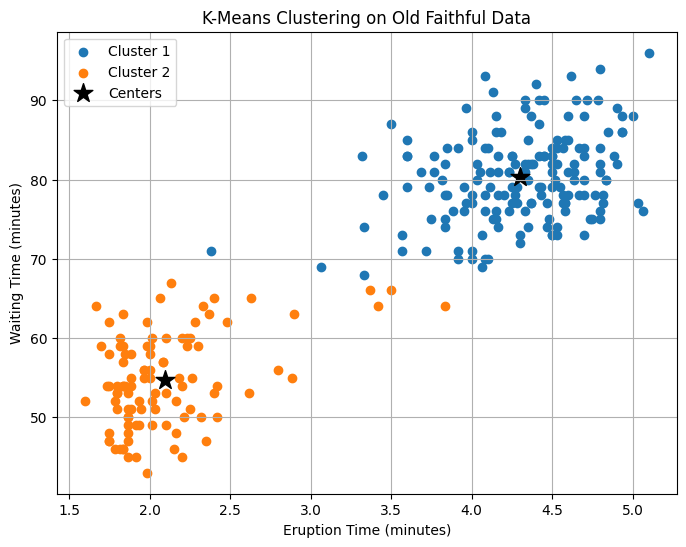

In [7]:
# Scatter plot with cluster coloring
plt.figure(figsize=(8,6))
for i in range(k):
    plt.scatter(X[labels == i, 0], X[labels == i, 1], label=f'Cluster {i+1}')
plt.scatter(centers[:,0], centers[:,1], color='black', marker='*', s=200, label='Centers')
plt.title('K-Means Clustering on Old Faithful Data')
plt.xlabel('Eruption Time (minutes)')
plt.ylabel('Waiting Time (minutes)')
plt.legend()
plt.grid(True)
plt.show()

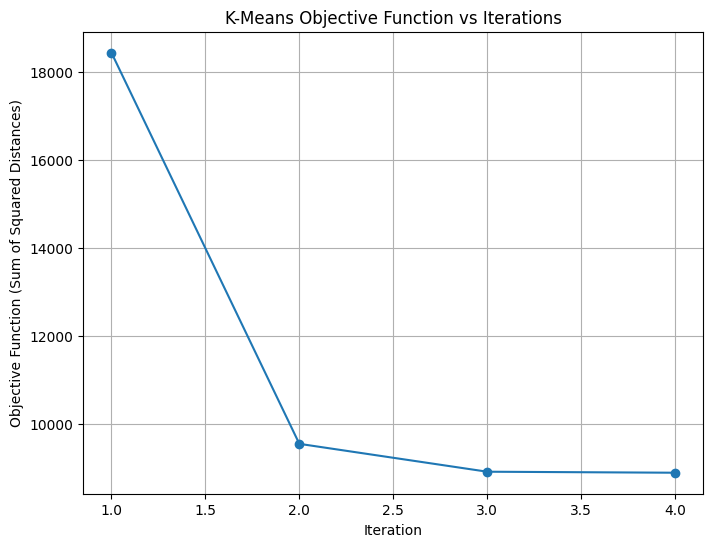

In [9]:
# Plot of objective function vs iterations
plt.figure(figsize=(8,6))
plt.plot(range(1, len(objectives)+1), objectives, marker='o')
plt.title('K-Means Objective Function vs Iterations')
plt.xlabel('Iteration')
plt.ylabel('Objective Function (Sum of Squared Distances)')
plt.grid(True)
plt.show()